<a href="https://colab.research.google.com/github/kumardesappan/colab-notebooks/blob/main/ti_edgeai_tidl_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EdgeAI TIDL Tools 

## Intorducntion
This notebooks follows the steps mentioned in [edgeai-tidl-tools](https://github.com/TexasInstruments/edgeai-tidl-tools) github repository and prepares PC emviroment for Model compilation and PC emualtion of inference. The compailed models can be copied to EVM/SK board for validation/bemchmarking of DL inference on the target device.

## Prepare Colab Runtime

The default the ubuntu version used by colab instance is 18.04 with python 3.7. The below sections sets up right python 3.6 and pip3 versions

In [ ]:
!sudo update-alternatives --set python3 /usr/bin/python3.6
!curl https://bootstrap.pypa.io/pip/3.6/get-pip.py -o get-pip.py
!python3 get-pip.py --force-reinstall

## Clone and Setup Edgai-TIDL-Tools

The below setup is configured for J& device with python3 API examples only. For CPP example refer documentaion in the repo and update the setup command accordingly

In [ ]:
!git clone https://github.com/TexasInstruments/edgeai-tidl-tools.git
!export DEVICE=j7 && cd edgeai-tidl-tools && source ./setup.sh  --skip_arm_gcc_download --skip_cpp_deps

## Compilation of TFLite model with TIDL Delegate

The below command invokes the python script to compile TFLite models with TIDL Delegate. 

In [ ]:
!export DEVICE=j7 && \
export LD_LIBRARY_PATH=/content/edgeai-tidl-tools/tidl_tools && \
export TIDL_TOOLS_PATH=/content/edgeai-tidl-tools/tidl_tools && \
cd ./edgeai-tidl-tools/examples/osrt_python/tfl && \
python3 tflrt_delegate.py -c 

##Model Artifatcs
The model artofatcs generated bu compialtion steps can be found in the below path

In [11]:
!ls -l /content/edgeai-tidl-tools/model-artifacts

total 12
drwxr-xr-x 3 root root 4096 Jun 23 09:51 cl-tfl-mobilenet_v1_1.0_224
drwxr-xr-x 3 root root 4096 Jun 23 09:52 od-tfl-ssd_mobilenet_v2_300_float
drwxr-xr-x 3 root root 4096 Jun 23 09:54 ss-tfl-deeplabv3_mnv2_ade20k_float


## Inference of compialed artficats in PC emualtion mode

The below command invokes the python script to run the generated/compailed model artifacts in PC emualtion mode

In [ ]:
!export DEVICE=j7 && \
export LD_LIBRARY_PATH=/content/edgeai-tidl-tools/tidl_tools && \
export TIDL_TOOLS_PATH=/content/edgeai-tidl-tools/tidl_tools && \
cd ./edgeai-tidl-tools/examples/osrt_python/tfl && \
python3 tflrt_delegate.py

## Inference Results

The output generated from Inference of compialed artficats in PC emualtion mode can be founc in below path

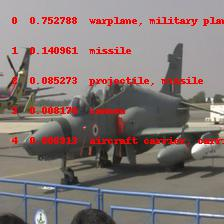

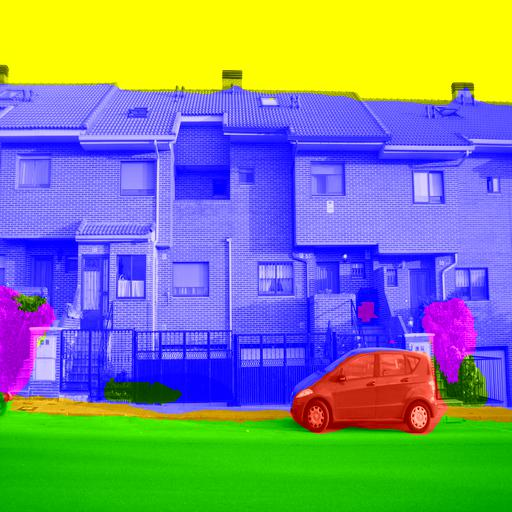

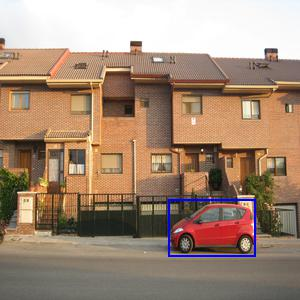

In [10]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/edgeai-tidl-tools/output_images/*.jpg'): #assuming JPG
    display(Image(filename=imageName))